In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv(r'D:\certificates\internship\microsoft_ai_basics\diabetes.csv')
 

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [12]:
# Data Standardization
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [14]:
X = standardized_data
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [61]:
# Function for evaluating models
def evaluate_model(model, model_name, X_test, Y_test):
    print(f"\n=== Evaluation Metrics for {model_name} ===")
    y_pred = model.predict(X_test)
    
    print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
    print("\nClassification Report:\n", classification_report(Y_test, y_pred))

    if hasattr(model, "predict_proba"):
        auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
        print("AUC Score:", auc)
    elif hasattr(model, "decision_function"):
        from sklearn.metrics import roc_curve
        y_score = model.decision_function(X_test)
        auc = roc_auc_score(Y_test, y_score)
        print("AUC Score:", auc)
        

Logistic Regression - Train Accuracy: 0.7850162866449512
Logistic Regression - Test Accuracy: 0.7597402597402597

=== Evaluation Metrics for Logistic Regression ===
Confusion Matrix:
 [[89 11]
 [26 28]]


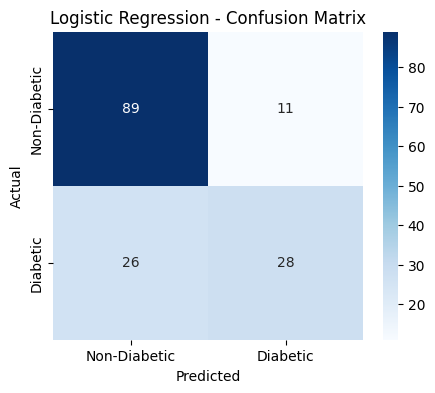


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154

AUC Score: 0.7937037037037038


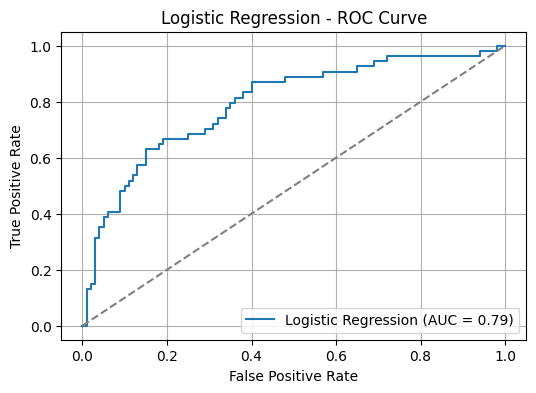

In [55]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
log_train_accuracy = accuracy_score(log_model.predict(X_train), Y_train)
log_test_accuracy = accuracy_score(log_model.predict(X_test), Y_test)
print("Logistic Regression - Train Accuracy:", log_train_accuracy)
print("Logistic Regression - Test Accuracy:", log_test_accuracy)

evaluate_model(log_model, "Logistic Regression", X_test, Y_test)

Random Forest - Train Accuracy: 1.0
Random Forest - Test Accuracy: 0.7597402597402597

=== Evaluation Metrics for Random Forest ===
Confusion Matrix:
 [[87 13]
 [24 30]]


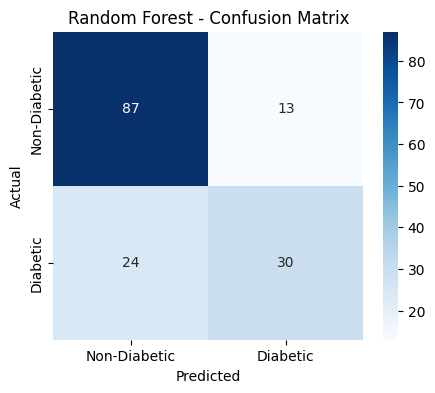


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.70      0.56      0.62        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154

AUC Score: 0.7850925925925927


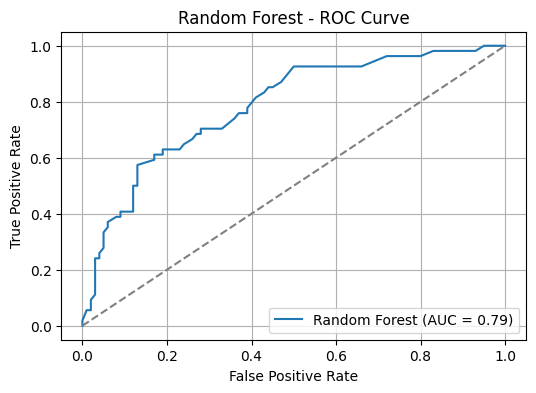

In [56]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
rf_train_accuracy = accuracy_score(rf_model.predict(X_train), Y_train)
rf_test_accuracy = accuracy_score(rf_model.predict(X_test), Y_test)
print("Random Forest - Train Accuracy:", rf_train_accuracy)
print("Random Forest - Test Accuracy:", rf_test_accuracy)


evaluate_model(rf_model, "Random Forest", X_test, Y_test)

SVM - Train Accuracy: 0.7866449511400652
SVM - Test Accuracy: 0.7727272727272727

=== Evaluation Metrics for SVM ===
Confusion Matrix:
 [[91  9]
 [26 28]]


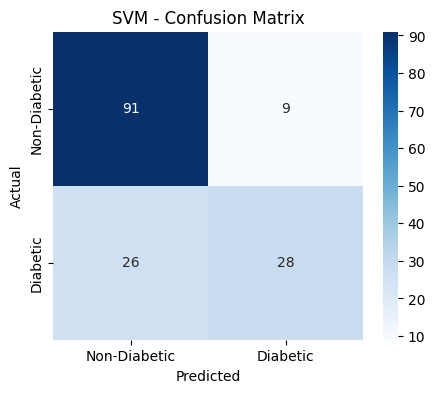


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

AUC Score: 0.7920370370370371


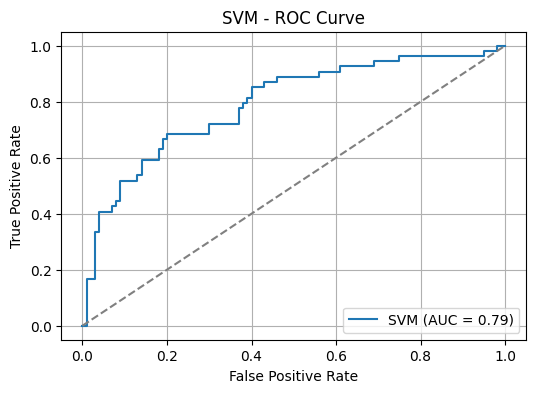

In [57]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
svm_train_accuracy = accuracy_score(svm_model.predict(X_train), Y_train)
svm_test_accuracy = accuracy_score(svm_model.predict(X_test), Y_test)
print("SVM - Train Accuracy:", svm_train_accuracy)
print("SVM - Test Accuracy:", svm_test_accuracy)

# Evaluate SVM
evaluate_model(svm_model, "SVM", X_test, Y_test)

KNN - Train Accuracy: 0.8289902280130294
KNN - Test Accuracy: 0.7207792207792207

=== Evaluation Metrics for K-Nearest Neighbors ===
Confusion Matrix:
 [[87 13]
 [30 24]]


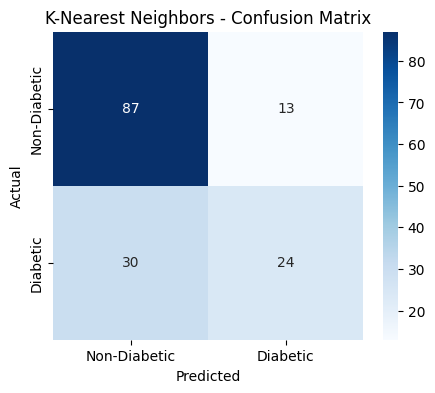


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154

AUC Score: 0.7555555555555555


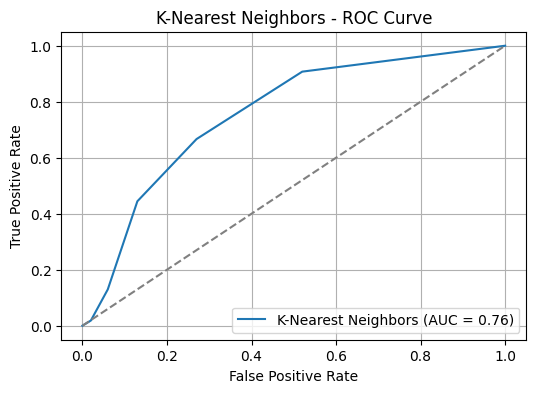

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
knn_train_accuracy = accuracy_score(knn_model.predict(X_train), Y_train)
knn_test_accuracy = accuracy_score(knn_model.predict(X_test), Y_test)
print("KNN - Train Accuracy:", knn_train_accuracy)
print("KNN - Test Accuracy:", knn_test_accuracy)

# Evaluate KNN
evaluate_model(knn_model, "K-Nearest Neighbors", X_test, Y_test)

Decision Tree - Train Accuracy: 1.0
Decision Tree - Test Accuracy: 0.7077922077922078

=== Evaluation Metrics for Decision Tree ===
Confusion Matrix:
 [[84 16]
 [29 25]]


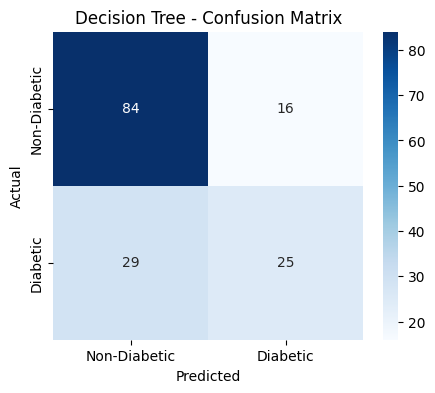


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       100
           1       0.61      0.46      0.53        54

    accuracy                           0.71       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.70      0.71      0.70       154

AUC Score: 0.6514814814814816


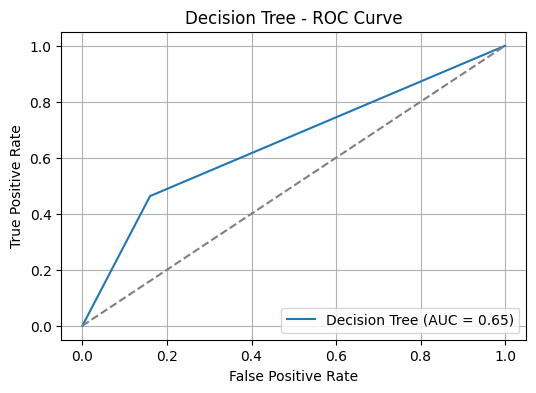

In [59]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
dt_train_accuracy = accuracy_score(dt_model.predict(X_train), Y_train)
dt_test_accuracy = accuracy_score(dt_model.predict(X_test), Y_test)
print("Decision Tree - Train Accuracy:", dt_train_accuracy)
print("Decision Tree - Test Accuracy:", dt_test_accuracy)

# Evaluate Decision Tree
evaluate_model(dt_model, "Decision Tree", X_test, Y_test)

In [64]:
# Input data for prediction
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)

# Models for prediction
models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Decision Tree': dt_model
}

# Loop through each model, predict and print results
for model_name, model in models.items():
    prediction = model.predict(std_data)
    print(f"\n=== Prediction using {model_name} ===")
    if prediction[0] == 0:
        print("The person is not diabetic")
    else:
        print("The person is diabetic")



=== Prediction using Logistic Regression ===
The person is diabetic

=== Prediction using Random Forest ===
The person is diabetic

=== Prediction using SVM ===
The person is diabetic

=== Prediction using KNN ===
The person is not diabetic

=== Prediction using Decision Tree ===
The person is diabetic


C:\Users\kbvis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
11,138,76,0,0,33.2,0.42,35
# Input data for prediction
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51) # actual label 1(diabetic)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)

# Models for prediction
models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Decision Tree': dt_model
}

# Loop through each model, predict and print results
for model_name, model in models.items():
    prediction = model.predict(std_data)
    print(f"\n=== Prediction using {model_name} ===")
    if prediction[0] == 0:
        print("The person is not diabetic")
    else:
        print("The person is diabetic")




=== Prediction using Logistic Regression ===
The person is diabetic

=== Prediction using Random Forest ===
The person is diabetic

=== Prediction using SVM ===
The person is diabetic

=== Prediction using KNN ===
The person is not diabetic

=== Prediction using Decision Tree ===
The person is diabetic


C:\Users\kbvis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [68]:
11,138,76,0,0,33.2,0.42,35
# Input data for prediction
input_data = (4,103,60,33,192,24,0.966,33) # actual label 0( non-diabetic)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)

# Models for prediction
models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Decision Tree': dt_model
}

# Loop through each model, predict and print results
for model_name, model in models.items():
    prediction = model.predict(std_data)
    print(f"\n=== Prediction using {model_name} ===")
    if prediction[0] == 0:
        print("The person is not diabetic")
    else:
        print("The person is diabetic")




=== Prediction using Logistic Regression ===
The person is not diabetic

=== Prediction using Random Forest ===
The person is not diabetic

=== Prediction using SVM ===
The person is not diabetic

=== Prediction using KNN ===
The person is not diabetic

=== Prediction using Decision Tree ===
The person is not diabetic


C:\Users\kbvis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
